In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('bollywood.csv')

df.head()

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224


**1. How many records are present in the dataset? Print the metadata information of the dataset.**

In [3]:
# Number of records
print("Total number of records:", df.shape[0])

# Metadata info
print(df.info())


Total number of records: 149
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SlNo                 149 non-null    int64  
 1   Release Date         149 non-null    object 
 2   MovieName            149 non-null    object 
 3   ReleaseTime          149 non-null    object 
 4   Genre                149 non-null    object 
 5   Budget               149 non-null    int64  
 6   BoxOfficeCollection  149 non-null    float64
 7   YoutubeViews         149 non-null    int64  
 8   YoutubeLikes         149 non-null    int64  
 9   YoutubeDislikes      149 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 11.8+ KB
None


**2. How many movies got released in each genre? Which genre had highest number of releases? Sort number of releases in each genre in descending order.**

In [4]:
number_of_genres = df['Genre'].value_counts()
print(number_of_genres)

print('\n Highest number of movie belongs to the genre:', number_of_genres.idxmax())
print('\n Descending sorted genre counts:\n', number_of_genres.sort_values(ascending = False))


Genre
Comedy      36
Drama       35
Thriller    29
Romance     25
Action      24
Name: count, dtype: int64

 Highest number of movie belongs to the genre: Comedy

 Descending sorted genre counts:
 Genre
Comedy      36
Drama       35
Thriller    29
Romance     25
Action      24
Name: count, dtype: int64


**3. How many movies in each genre got released in different release times like long weekend, festive season, etc. (Note: Do a cross tabulation between Genre and ReleaseTime.)**

In [5]:
diff_release = pd.crosstab(df['Genre'], df['ReleaseTime'])
print(diff_release)

ReleaseTime  FS  HS  LW   N
Genre                      
Action        3   3   3  15
Comedy        3   5   5  23
Drama         4   6   1  24
Romance       3   3   4  15
Thriller      4   1   2  22


**4. Which month of the year, maximum number movie releases are seen? (Note: Extract a new column called month from ReleaseDate column.)**

In [6]:
df['updated_release_date'] = pd.to_datetime(df['Release Date'])
df['month'] = df['updated_release_date'].dt.month_name()

df['month'].value_counts().idxmax()


C:\Users\G M RIFAT REZA\AppData\Local\Temp\ipykernel_4556\3226792608.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['updated_release_date'] = pd.to_datetime(df['Release Date'])


'January'

**5. Which month of the year typically sees most releases of high budgeted movies, that is, movies with budget of 25 crore or more?**

In [7]:
budget_high = df[df['Budget'] >= 25]

budget_high_month = budget_high['month'].value_counts()
budget_high_month.idxmax()

'February'

**6. Which are the top 10 movies with maximum return on investment (ROI)? Calculate return on investment (ROI) as (BoxOfficeCollection – Budget) / Budget.**

In [8]:
df['ROI'] = (df['BoxOfficeCollection'] - df['Budget'])/ df['Budget']
df[['MovieName', 'ROI']].sort_values(by = 'ROI', ascending = False).head(10)

,MovieName,ROI
64,Aashiqui 2,8.166667
89,PK,7.647059
132,Grand Masti,7.514286
135,The Lunchbox,7.500000
87,Fukrey,6.240000
58,Mary Kom,5.933333
128,Shahid,5.666667
37,Humpty Sharma Ki Dulhania,5.500000
101,Bhaag Milkha Bhaag,4.466667
115,Chennai Express,4.266667


**7. Do the movies have higher ROI if they get released on festive seasons or long weekend? Calculate the  average ROI for different release times.**

In [9]:
df.groupby('ReleaseTime')['ROI'].mean().sort_values(ascending = False)

ReleaseTime
LW    1.127205
FS    0.973853
HS    0.850867
N     0.657722
Name: ROI, dtype: float64

Yes the movies have higher ROI if they get released on festive seasons(ROI 0.97) or long weekend(ROI 1.127).

**8. Draw a histogram and a distribution plot to find out the distribution of movie budgets. Interpret the plot  to conclude if the most movies are high or low budgeted movies.**

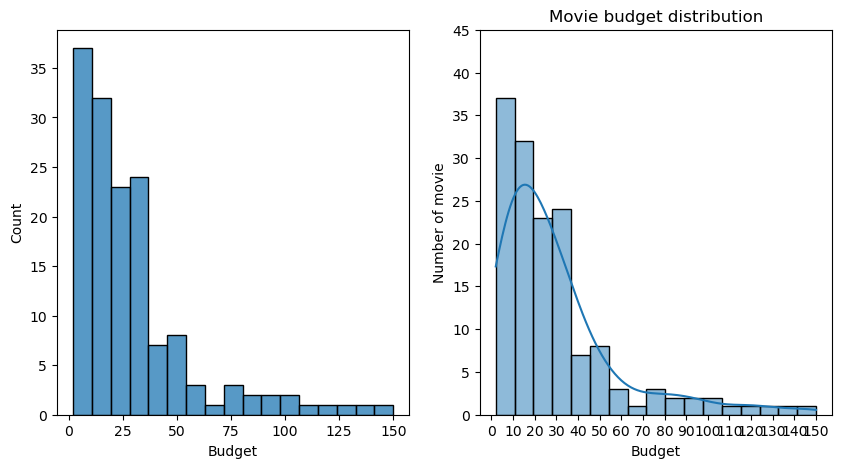

In [20]:
plt.figure(figsize = (10,5))

plt.subplot(1, 2, 1)
sns.histplot(df['Budget'])
plt.subplot(1, 2, 2)
sns.histplot(df['Budget'], kde = True)
plt.title('Movie budget distribution')
plt.xlabel('Budget')
plt.xticks(range(0, 160, 10))
plt.yticks(range(0, 50, 5))
plt.ylabel('Number of movie')
plt.show()

**Interpretation:**<br>
* It is a right-skewed distribution.
* Large concentration of the movies fall within low budget range(budget less than 25)
* Very few movies have very high budget(budget more than 100)
* Most of the movies got average budget (budget more than 25 and less than 100)

**9. Compare the distribution of ROIs between movies with comedy genre and drama. Which genre typically sees higher ROIs?**

C:\Users\G M RIFAT REZA\AppData\Local\Temp\ipykernel_4556\1929143005.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sub_df, x='Genre', y='ROI', palette='Set1')


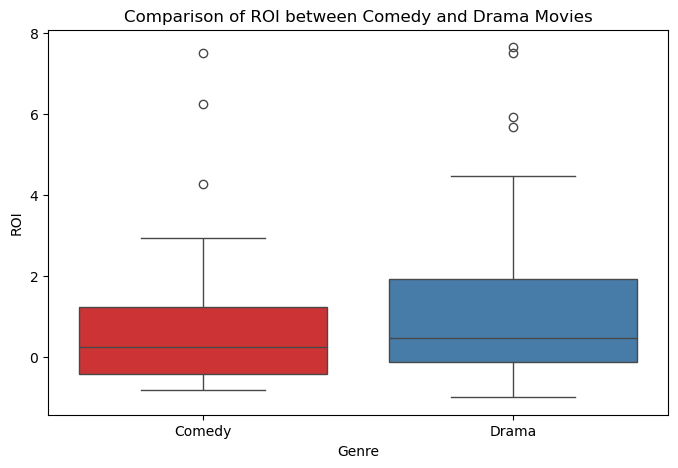

In [11]:
sub_df = df[df['Genre'].isin(['Comedy', 'Drama'])]

plt.figure(figsize=(8,5))
sns.boxplot(data=sub_df, x='Genre', y='ROI', palette='Set1')
plt.title('Comparison of ROI between Comedy and Drama Movies')
plt.show()

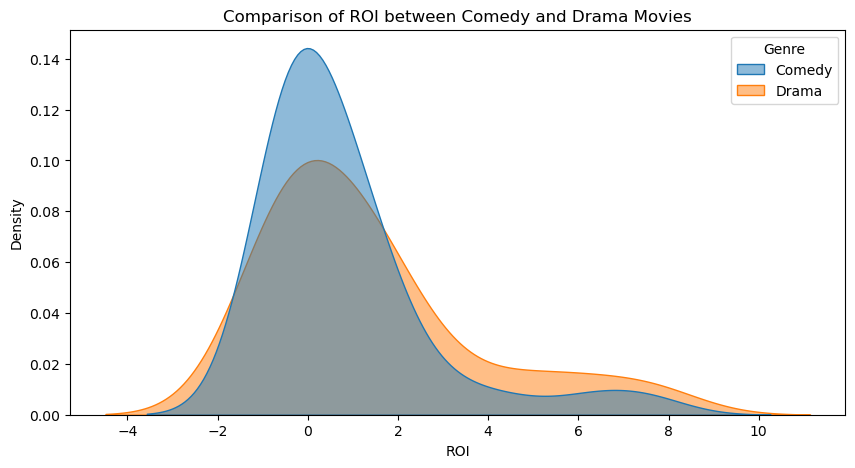

In [12]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=sub_df, x='ROI', hue='Genre', fill=True, alpha=0.5)
plt.title('Comparison of ROI between Comedy and Drama Movies')
plt.xlabel('ROI')
plt.ylabel('Density')
plt.show()

Both The boxplot and kdeplot clearly show that Drama movies usually have higher ROI than Comedy movies because.

**10.  Is there a correlation between box office collection and YouTube likes? Is the correlation positive or negative?**

In [13]:
correlation = df['BoxOfficeCollection'].corr(df['YoutubeLikes'])
print("Correlation between BoxOfficeCollection and YoutubeLikes:", correlation)

Correlation between BoxOfficeCollection and YoutubeLikes: 0.6825165877731297


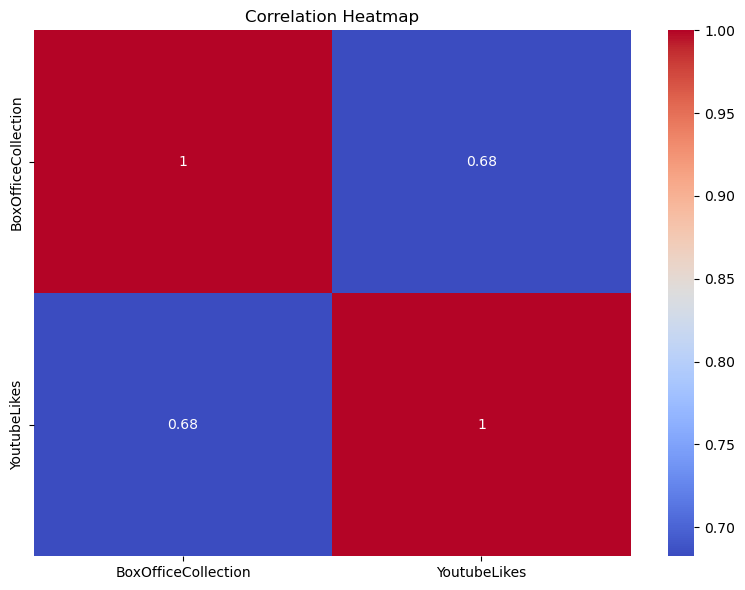

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['BoxOfficeCollection', 'YoutubeLikes']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

From the heatmap and the calculation we see that the correlation between BoxOfficeCollection and YoutubeLikes: 0.68.<br>
0.68 > 0, so it is a positive correlation.

**11. Which genre of movies typically sees more YouTube likes? Draw boxplots for each genre of movies to compare.**

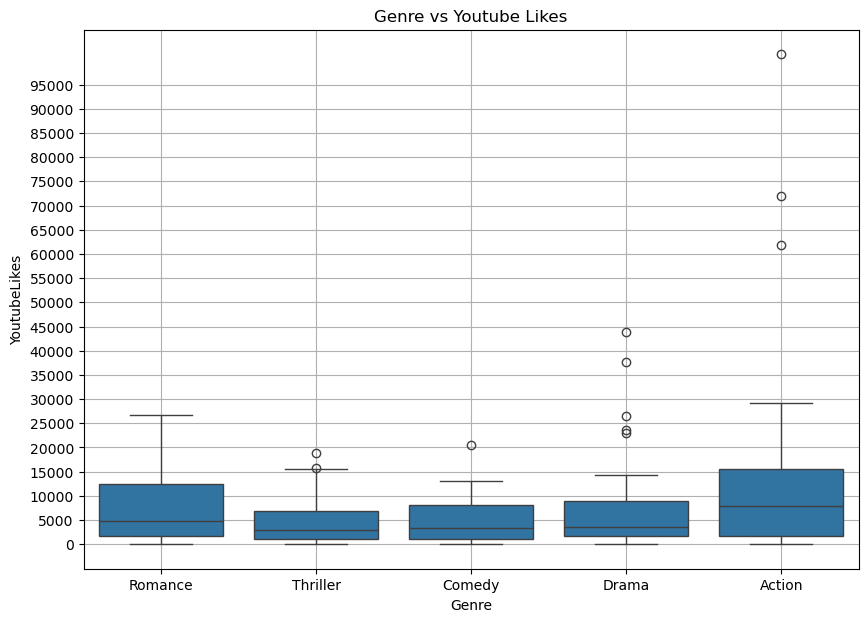

In [15]:
plt.figure(figsize=(10,7))

sns.boxplot(data = df, x = 'Genre', y = 'YoutubeLikes')
plt.grid()
plt.yticks(range(0, 100000, 5000))
plt.title('Genre vs Youtube Likes')
plt.show()


from the box plot we can say that action movies typically sees more YouTube likes.

**12. Which of the variables among Budget, BoxOfficeCollection, YoutubeView, YoutubeLikes, YoutubeDislikes are highly correlated? Note: Draw pair plot or**

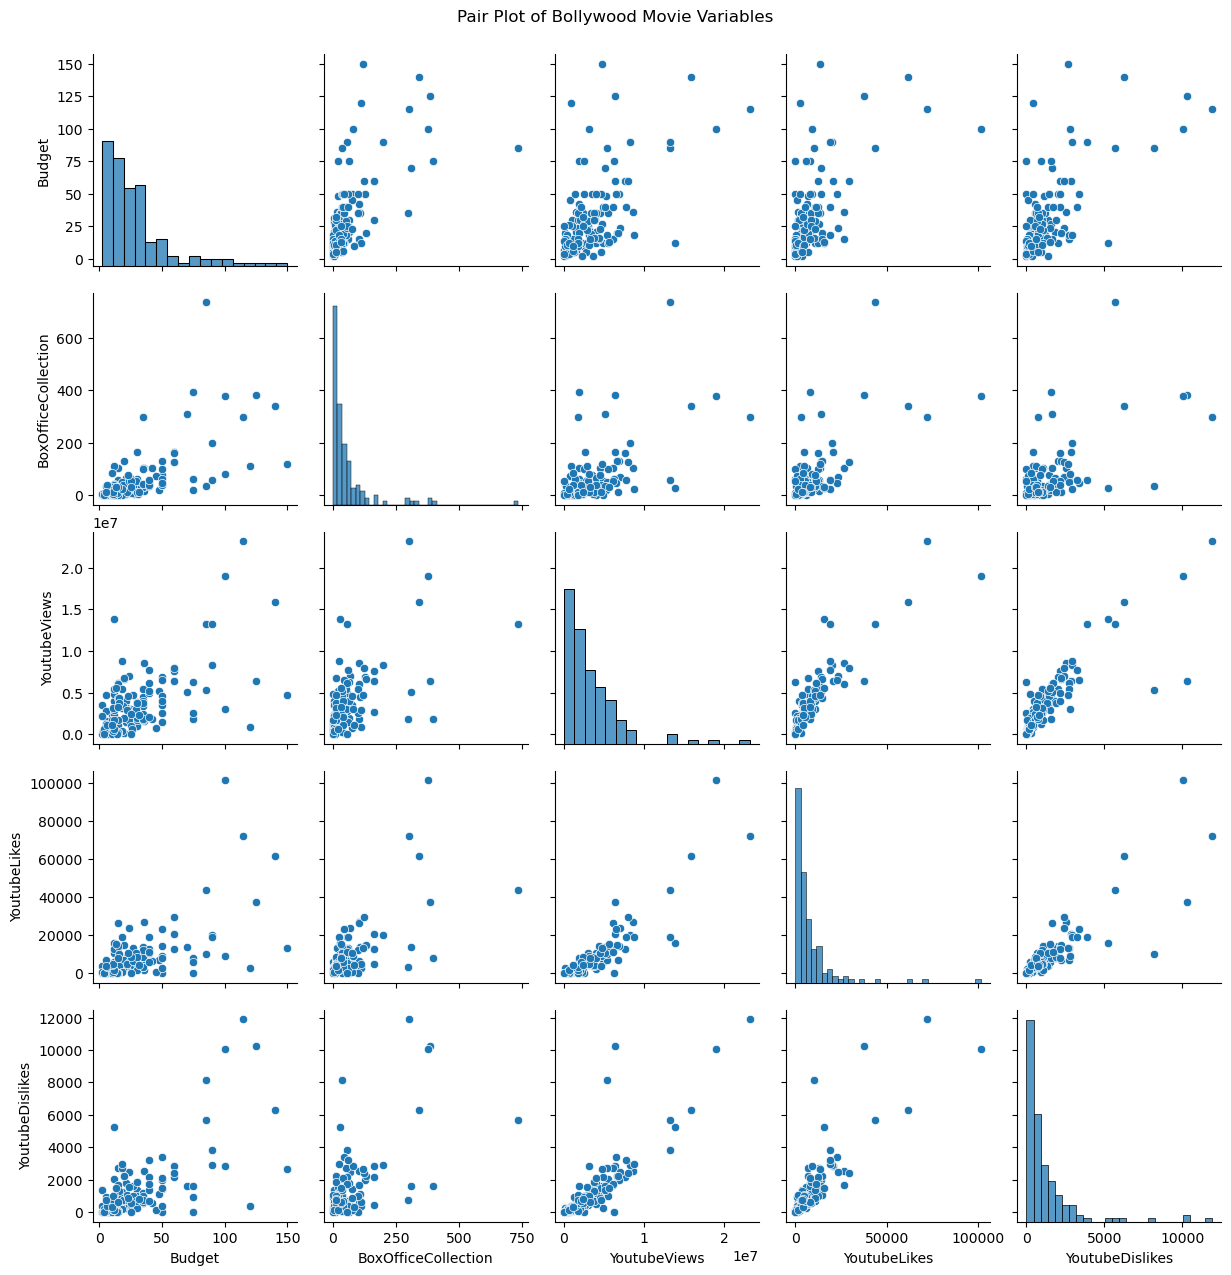

In [16]:
selected_cols = ['Budget', 'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes', 'YoutubeDislikes']

# Pair plot
sns.pairplot(df[selected_cols])
plt.suptitle("Pair Plot of Bollywood Movie Variables", y=1.02)
plt.show()

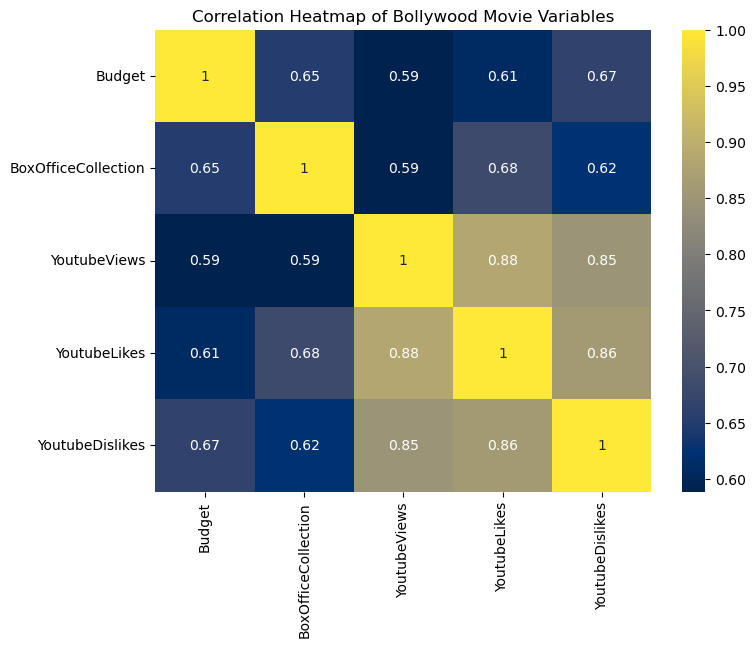

In [17]:
plt.figure(figsize=(8,6))
sns.heatmap(df[selected_cols].corr(), annot=True, cmap="cividis")
plt.title("Correlation Heatmap of Bollywood Movie Variables")
plt.show()

Analyzing the pair plot and the heatmap, we see that the variables that are highly correlated are:
1. YoutubeViews vs YoutubeLikes (correlation 0.88)
2. YoutubeLikes vs YoutubeDislikes (correlation 0.86)
3. YoutubeViews vs YoutubeDislikes (correlation 0.85)